# Introducción a la Programación en Julia

Mauricio Tejada

ILADES - Universidad Alberto Hurtado

## ¿Qué esperar de este curso?

- Este curso enseña programación en Julia a aquellos que tienen muy poca o ninguna experiencia previa en el tema. 
- ¿Porqué Julia? Es fácil de aprender, es versátil, es eficiente y es muy útil para el análisis numérico. Además es gratuito. 
- Desarrollaremos las herramientas etándar que utilizamos los economistas y presentaremos diversas aplicaciones a problemas económicos concretos. 

**Material**

En el sitio web [www.mauriciotejada.com](https://www.mauriciotejada.com), en la sección Teaching encontrarán *Introduction to Programming in Julia*. 

**Temas Adeministrativos**

Consultas a [matejada@uahurtado.cl](mailto:matejada@uahurtado.cl)

## Motivación: Soluciones Numéricas vs Soluciones Algebraicas

Consideremos la siguiente función de demanda: $$q=p^{−0.2}$$

Dos preguntas fáciles de responder:

1. ¿Cuál es la función inversa de demanda?
2. ¿Cuál es el precio que clarea el mercado cuando la cantidad es 2?

Respuestas:

1. Solución algebraica: $$p=q^{−5}$$

Usando una calculadora:

In [1]:
p = 2.0^-5

0.03125

Ahora intentemos con una función de demanda algo diferente:
$$q=0.5p^{-0.2} + 0.5p^{-0.5}$$

Esta función contiene dos términos: 
- Una demanda doméstica.
- Una demanda por exportación.

Usando argumentos formales basados en los teoremas del Valor Intermedio y de la Función Implícita se puede establecer que la función inversa de demanda está bien definida, es continua y estrictamente decreciente. Por tanto, existe un único precio que clarea el mercado.

Solución a las preguntas (1) y (2): No existe un solución cerrada para la función inversa de demanda. ¿Cómo calculamos el precio que clarea el mercado?

**Alternativa:** Solución numérica.

In [2]:
p = 0.25
for i in 1:100
  global p
  deltap = (.5*p^-.2+.5*p^-.5-2)/(.1*p^-1.2 + .25*p^-1.5)
  p = p + deltap
  if abs(deltap) < 1.e-8
        break
  end
end 
println(p)

0.15419764093263605


Incluso podemos ver como luce la función de demanda inversa usando la misma idea:

In [4]:
q = collect(0.5:0.1:2.2)
P = zeros(length(q))
for j=1:length(q)
    global p, q  
    p = 0.25
    for i=1:100
        deltap = (.5*p^-.2+.5*p^-.5-q[j])/(.1*p^-1.2 + .25*p^-1.5)
        p = p + deltap
        if abs(deltap) < 1.e-8
            break
        end
    end 
    P[j] = p
end;

M = [q P]

18×2 Array{Float64,2}:
 0.5  8.35528
 0.6  4.63916
 0.7  2.87105
 0.8  1.91776
 0.9  1.35527
 1.0  1.0
 1.1  0.7634
 1.2  0.599005
 1.3  0.480751
 1.4  0.393201
 1.5  0.326786
 1.6  0.275345
 1.7  0.23478
 1.8  0.202285
 1.9  0.175895
 2.0  0.154198
 2.1  0.136164
 2.2  0.121028

In [5]:
using Plots

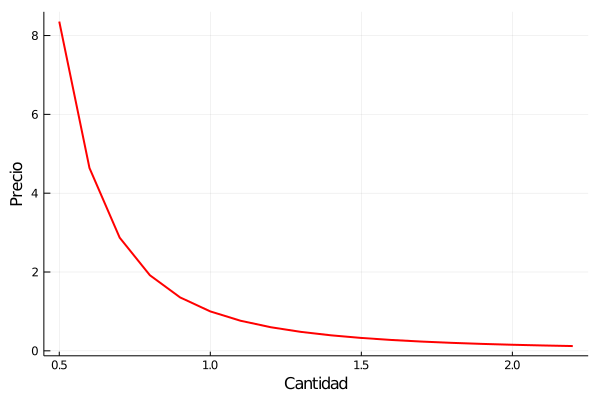

In [6]:
plot(q,P, xlabel="Cantidad", ylabel="Precio", color="red", legend=false, linewidth = 2)

Ademas interpolación lineal es útil para determinar el valor de la función entre puntos: ¿Cuál es el precio cuando la cantidad es 1.55?

In [7]:
using Interpolations

In [8]:
Pint = LinearInterpolation(q, P);
Pint(1.55)

0.3010652943124177